In [13]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../../input/BES/interpreted_seismics/interim_data/"
geo_model = gp.create_model("BES_model_seismic_v1")

Active grids: ['regular']
Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                              values
range                  46650.294747
$C_o$               51815476.190476
drift equations  [3, 3, 3, 3, 3, 3]


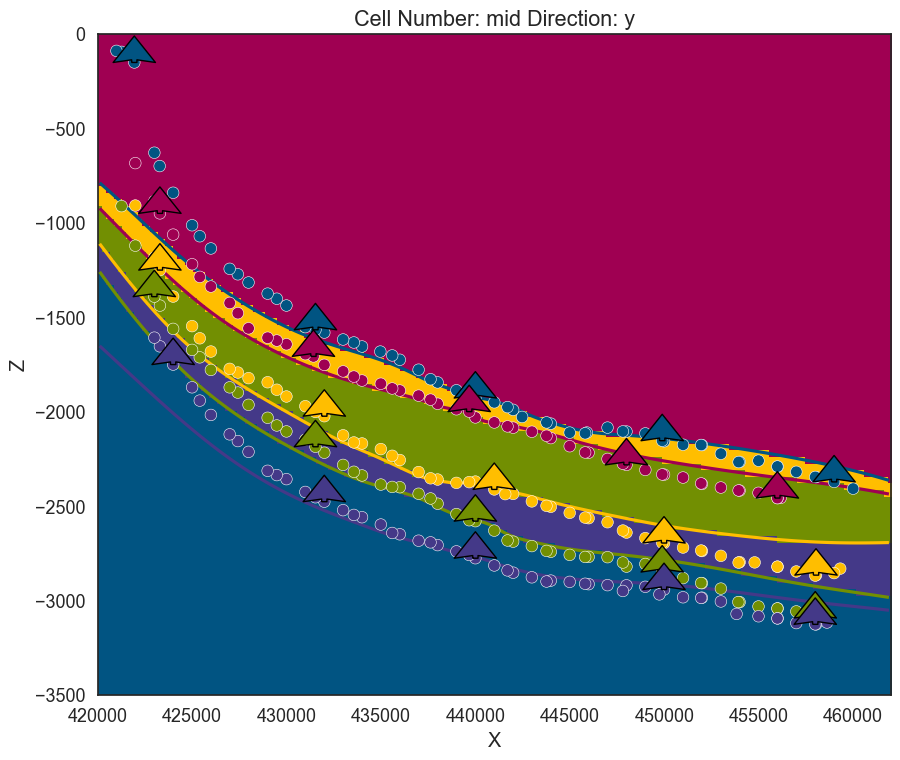

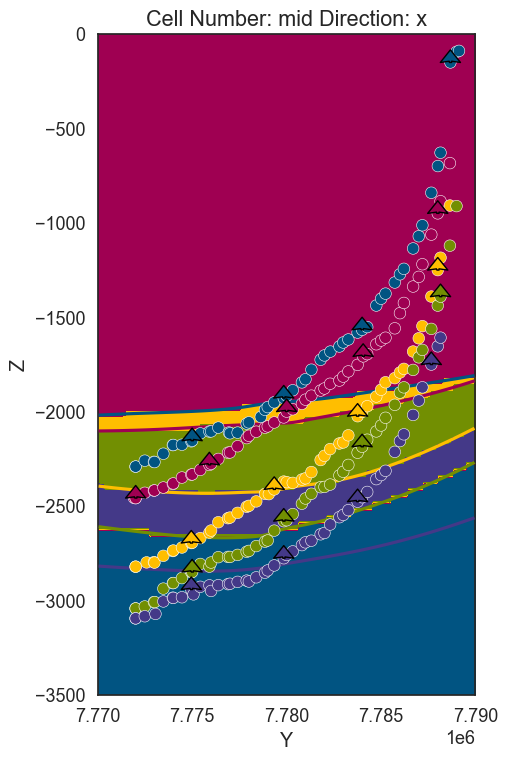

In [5]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[420000, 462000, 7770000, 7790000, -3500, 0],
    resolution=[200, 200, 100],
    path_i=data_path + "df_seis_gempy_format.csv",
    path_o=data_path + "orientation_points.csv",
)

# Ordenando as surfaces (Estratigrafia (topo para base)) 3
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Sea_floor": ("h0"),
        "Strat_1": ("h1"),
        "Strat_2": ("h2"),
        "Strat_3": ("h3"),
        "Strat_4": ("h4"),
        #"Basement": ("basement",),
    },
)

# Seção transversal do modelo
gp.plot_2d(
    geo_model, direction="y", show_data=True, show_lith=True, ve=10, legend=False
)
gp.plot_2d(
    geo_model, direction="x", show_data=True, show_lith=True, ve=10, legend=False
)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    show_data=True,
    ve=2,
)

# Interpolating and computing the model

gp.set_interpolator(
    geo_model,
    output=["geology"],
    compile_theano=True,
    theano_optimizer="fast_run",  # fast_compile, fast_run
    dtype="float64",  # for model stability
)

sol = gp.compute_model(geo_model, compute_mesh=False)

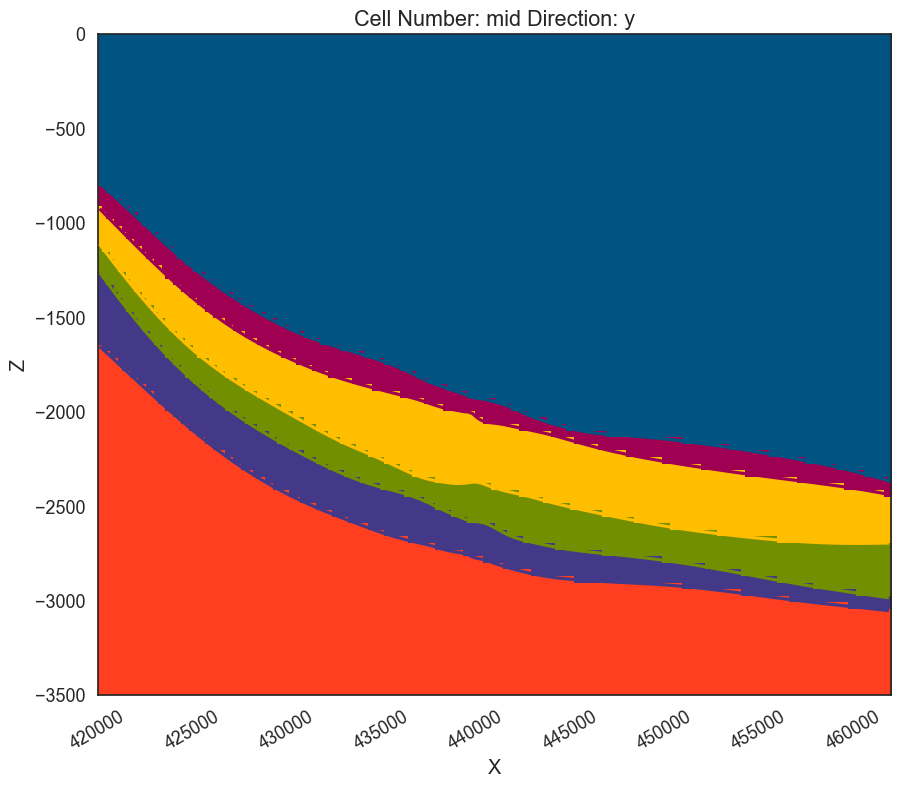

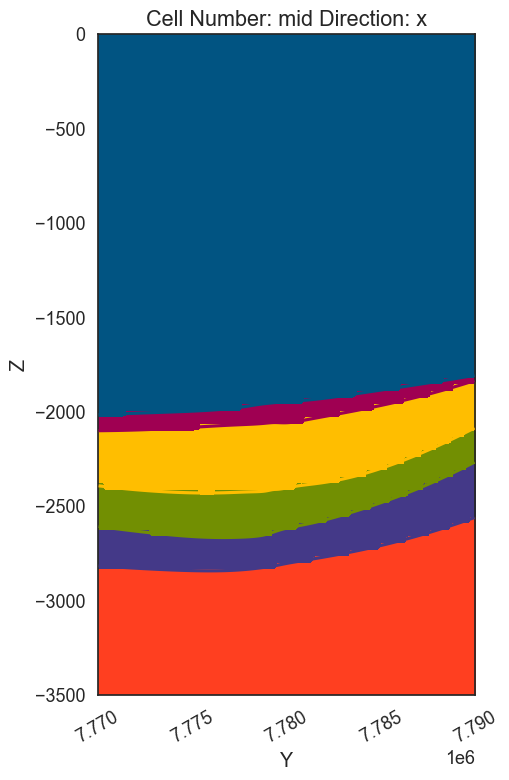

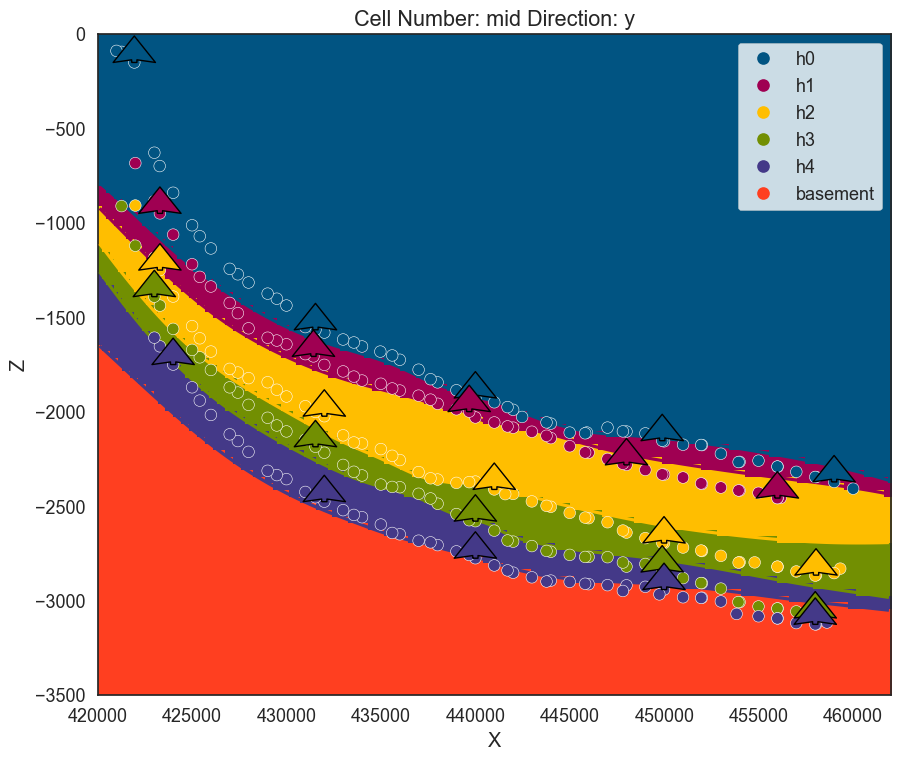

In [6]:
# Ploting 2D and 3D

# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=10,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=10,
    legend=True,
)

gp.plot_2d(
    geo_model,
    direction="y",
    show_data=True,
    show_lith=True,
    ve=10,
)

In [7]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="basic", show_data=False, ve=5)

plotter = gpv.p

# Adiciona uma luz
#plotter.enable_eye_dome_lighting()

# Customize the plot
#plotter.show_grid(all_edges=False)
plotter.show_bounds(font_size=6, location="furthest") # show_xaxis=False, show_yaxis=False, show_zaxis=Falsehttps://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.renderer.show_bounds#pyvista.Renderer.show_bounds
#plotter.add_text("BES", position=(500, 700, 1000), font_size=20)
plotter.set_background("white")
#plotter.border_color = "black" 

# Show the plot
plotter.show()

RuntimeError: This plotter has been closed and cannot be shown.

In [8]:
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=5)

In [14]:
geo_model.solutions


Lithology ids 
  [] 

In [9]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    compress=False,
    solution=True,
)

Directory already exists, files will be overwritten


AttributeError: You need to install Subsurface to be able to write the solutions.